## Imports

In [ ]:
import numpy as np
from collections import Counter

import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('ggplot')

import seaborn as sns
sns.set(font_scale=1.5)

## Notes:

- Definition of **conditional probability** (for finite sample space) is the proportion of time $A\cap B$ occurs divided by the proportion of time $B$ occurs:
<br></br><br></br>
$$
\begin{equation}
    \begin{split}
        P[A|B] &= \frac{N_{A\cap B}}{N_B} \\
               &= \frac{\big(\frac{N_{A\cap B}}{N_S}\big)}{\big(\frac{N_B}{N_S}\big)} \\
               &\approx \frac{P[A\cap B]}{P[B]} \\
               &\geq 0
    \end{split}
\end{equation}
$$
<br></br>
Note: we must assume the **marginal probability** satisfies $P[B] \neq 0$. Also, the event $B$ comprises a new sample space, denoted as the **reduced sample space**.

***
-  If $A$ and $C$ are mutually exclusive events, then

$$
P[A\cup C|B] = P[A|B] + P[C|B]
$$

***
- The **Law of Total Probability** states that for a partition of the sample space $S = \bigcup_{i=1}^{N}B_i$ such that $B_i\cap B_j = \emptyset$ for $i\neq j$ we have

$$
\begin{equation}
    \begin{split}
        P[A] &= \sum_{i=1}^{N}{P[A\cap B_i]} \\
             &= \sum_{i=1}^{N}{P[A| B_i]P[B_i]}
    \end{split}
\end{equation}
$$

***
- **Statistically Independent** events are characterized by $P[A\cap B] = P[A]P[B]$

***
- **Bayes Theorem** states that 
<br></br><br></br>
$$
P[B|A] = \frac{P[A|B]P[B]}{P[A]}
$$
<br></br>
where $P[B|A]$ is called the **posterior probability** and $P[B]$ is called the **prior probability**

***
- The **Binomial Probability Law** describes the probability of $k$ successes in $M$ Bernoulli trials:

$$
P[k] = {M\choose k}p^k(1-p)^{M-k}
$$

***
- The **Geometric Probability Law** describes the probability of the first success at trial $k$ if $M=k-1$ Bernoulli trials have been carried out

$$
P[k] = p(1-p)^{k-1}
$$

***
- The **Multinomial Probability Law** describes the probability of obtaining $k_1$ $s_1$'s, $k_2$ $s_2$'s, $\dots$, and $k_N$ $s_N$'s from a sample space $S=\{s_1, s_2, \dots, s_N\}$ where $M$ trials were performed with $N$ possible outcomes for each trial:
<br></br><br></br>
$$
P[k_1,k_2,\dots,k_N] =  {M \choose {k_1,k_2,\dots,k_N}} p_1^{k_1} p_2^{k_2} \dots p_N^{k_N}
$$
<br></br>
where ${M \choose {k_1,k_2,\dots,k_N}} = \frac{M!}{k_1!k_2!\dots k_N!}$ and $k_1 + k_2 + \dots + k_N = M$.
***
- Anywhere this picture occurs indicates a problem I need to check or finish:


![finish-me.jpg](https://i.pinimg.com/564x/a4/b6/38/a4b638b7d6926e4f494b1d94459052ff.jpg)

## Problems

### Key:

- __(w)__ indicates a __word__ problem
- __(f)__ indicates a __formula__ problem
- __(c)__ indicates a __computer__ problem
- __(t)__ indicates a __theoretical__ problem
- 😃 indicates the answer is available in the back

### 4.1 (f)

If $B\subset A$, what is $P[A|B]$? Explain your answer.

#### Answer:

If $B\subset A$ then we see that $A\cap B = B$, so the conditional probability must be

$$
\begin{equation}
    \begin{split}
        P[A|B] &= \frac{P[A\cap B]}{P[B]} \\
               &= \frac{P[ B]}{P[B]} \\
               &= 1.
    \end{split}
\end{equation}
$$

***
### 4.2 😃(f)

A point $x$ is chosen at random with within the interval $(0,1)$. If it is known that $x \geq \frac{1}{2}$, what is the probability that $x \geq \frac{7}{8}?$

#### Answer:

Let $B=\{ x\geq \frac{1}{2}\}$ and $A=\{ x \geq \frac{7}{8}\}$, where we will also assume uniform probabilities in $(0,1)$. Then $A\cap B = \{ x\in[\frac{1}{2}, 1)\cap [\frac{7}{8}, 1)\} = \{x\in[\frac{7}{8},1)\}$, which is just $A$. So the conditional probability is

$$
\begin{equation}
    \begin{split}
        P[A|B] &= \frac{P[A\cap B]}{P[B]} \\
               &= \frac{P[A]}{P[B]} \\
               &= \frac{ \bigg( \frac{1 - \frac{7}{8}}{1-0}\bigg)}{ \bigg( \frac{1 - \frac{1}{2}}{1-0}\bigg)} \\
               &= \frac{1}{4}
    \end{split}
\end{equation}
$$

****
### 4.3 (w)

A coin is tossed three times with each 3-tuple outcome being equally likely. Find the probability of obtaining $(H,T,H)$ if it is known that the outcome has $2$ heads. Do this by 
1. using the idea of a reduced sample space and 
2. using the definition of conditional probability

#### Answer:

Let $B=\{$ There are two heads $\} = \{(H,T,H),(T,H,H),(H,H,T)\}$ and $A=\{(H,T,H)\}$, where the sample space is 

$$
\begin{equation}
    \begin{split}
        S = \{&(H,H,H),(H,H,T),(H,T,H), \\
              &(T,H,H),(T,T,H),(T,H,T), \\
              &(H,T,T),(T,T,T)\}.
    \end{split}
\end{equation}
$$

We can check if the number of elements is correct by noticing that $N_S = {2\choose 1}^3 = 8$. Then $A\cap B = \{ (H,T,H) \}$, which is just $A$. So the conditional probability is

$$
\begin{equation}
    \begin{split}
        P[A|B] &= \frac{P[A\cap B]}{P[B]} \\
               &= \frac{P[A]}{P[B]} \\
               &= \frac{ \big(\frac{1}{8} \big)}{ \big(\frac{3}{8} \big)} \\
               &= \frac{1}{3}.
    \end{split}
\end{equation}
$$

Alternatively we could use the notion of reduced sample space to solve the problem:

$$
\begin{equation}
    \begin{split}
        P[A|B] &= \frac{N_{A\cap B}}{N_B} \\
               &= \frac{ \big| \{(H,T,H)\} \big|}{ \big| \{(H,T,H),(T,H,H),(H,H,T)\} \big|} \\
               &= \frac{1}{3}
    \end{split}
\end{equation}
$$

since there are only three events that contain two heads in the sample space.

***
### 4.4 (w)

Two dice are tossed. Each 2-tuple outcome is equally likely. Find the probability that the number that comes up on die 1 is the same as the number that comes up on die 2 if it is known that the sum of these numbers is even.

#### Answer:

Let $B=\{ D_1+D_2$ is even$ \}$ and $A=\{$ the number on $D_1$ is the same as on $D_2\}$. The sample space is 

$D_i$    |  1  |  2  |  3  |  4  |  5  |  6 
---------|-----|-----|-----|-----|-----|-----
**1**    |**<span style="color:blue">(1,1)</span>**|(1,2)|<span style="color:blue">(1,3)</span>|(1,4)|<span style="color:blue">(1,5)</span>|(1,6)
**2**    |(2,1)|**<span style="color:blue">(2,2)</span>**|(2,3)|<span style="color:blue">(2,4)</span>|(2,5)|<span style="color:blue">(2,6)</span>
**3**    |<span style="color:blue">(3,1)</span>|(3,2)|**<span style="color:blue">(3,3)</span>**|(3,4)|<span style="color:blue">(3,5)</span>|(3,6)
**4**    |(4,1)|<span style="color:blue">(4,2)</span>|(4,3)|**<span style="color:blue">(4,4)</span>**|(4,5)|<span style="color:blue">(4,6)</span>
**5**    |<span style="color:blue">(5,1)</span>|(5,2)|<span style="color:blue">(5,3)</span>|(5,4)|**<span style="color:blue">(5,5)</span>**|(5,6)
**6**    |(6,1)|<span style="color:blue">(6,2)</span>|(6,3)|<span style="color:blue">(6,4)</span>|(6,5)|**<span style="color:blue">(6,6)</span>**

where <span style="color:blue">blue</span> colored entries depict outcomes in $B$ and **<span style="color:blue">bold blue</span>** depict outcomes in $A$. Note that $A\subset B$. Then the reduced sample space is given by $N_B=18$ while $N_{A\cap B}=6$ so the conditional probability is

$$
\begin{equation}
    \begin{split}
        P[A|B] &= \frac{6}{ 18 } \\
               &= \frac{1}{3}.
    \end{split}
\end{equation}
$$

Alternatively, we could calculate the probability directly from the definition:

$$
\begin{equation}
    \begin{split}
        P[A|B] &= \frac{P[A\cap B]}{P[B]} \\
               &= \frac{ \big(\frac{6}{36} \big)}{ \big(\frac{18}{36} \big)} \\
               &= \frac{1}{3}.
    \end{split}
\end{equation}
$$

***
### 4.5 😃(f)

An urn contains $3$ red balls and $2$ black balls. If two balls are chosen without replacement, find the probability that the second ball is black if it is known that the first ball chosen is black.

#### Answer:

Intuitively, $P[A|B] = \frac{1}{4}$ because there is one black ball left to choose from out of the four remaining balls (this is the idea of the reduced sample space).

Alternatively, let $B = \{1^{st}$ball is black$\}$ and $A = \{2^{nd}$ball is black$\}$. We are given an urn with five balls: $R_1,R_2,R_3,B_1,B_2$. The sample space is given by 

$$
\begin{equation}
    \begin{split}
        S = \{&(R_1,R_2),(R_1,R_3),(R_2,R_3),(B_1,B_2),(R_1,B_1) \\
              &(R_2,B_1),(R_3,B_1),(R_1,B_2),(R_2,B_2),(R_3,B_2) \\
              &(R_2,R_1),(R_3,R_1),(R_3,R_2),(B_2,B_1),(B_1,R_1) \\
              &(B_1,R_2),(B_1,R_3),(B_2,R_1),(B_2,R_2),(B_2,R_3)\}
    \end{split}
\end{equation}
$$

where $N_S = 20$. Next, notice that $A\cap B = \{(B_1,B_2),(B_2,B_1)\}$ so $N_{A\cap B}=2$ and $P[A\cap B] = \frac{2}{20}$. To find $P[B]$ we count the outcomes from the sample space for which the $1^{st}$ ball is black, $N_{ B}=8$, so $P[B] = \frac{8}{20}$. Alternatively, we could just notice that there are $N_B = {2 \choose 1}$ ways to pick the first black ball out of ${5 \choose 1}$ choices for the $1^{st}$ ball so $P[B] = \frac{{2 \choose 1}}{{5 \choose 1}}= \frac{2}{5}$. Hence, the conditional probability is given by 

$$
\begin{equation}
    \begin{split}
        P[A|B] &= \frac{P[A\cap B]}{P[B]} \\
               &= \frac{ \big(\frac{2}{20} \big)}{ \big(\frac{8}{20} \big)} \\
               &= \frac{1}{4}.
    \end{split}
\end{equation}
$$

***
### 4.6 (f)

A coin is tossed $11$ times in succession. Each 11-tuple outcome is equally likely to occur. If the first $10$ tosses produced all heads, what is the probability that the $11^{th}$ toss will also be a head?

#### Answer:

Each coin toss subexperiment is an independent event that is not influenced by any prior coin tosses. We can represent each outcome as an $11-$tuple $(d_1,d_2,\dots,d_{11})$ where each $d_i\in\{H,T\}$. If we let $B = \{10$ Heads in a row $\}$ and $A = \{$ the next toss is Heads $\}$ then 

$$
\begin{equation}
    \begin{split}
        P[A|B] &= \frac{P[A\cap B]}{P[B]} \\
               &= \frac{P[A]P[B]}{P[B]} \\
               &= P[A]\\
               &= \frac{1}{2}.
    \end{split}
\end{equation}
$$

Alternatively, we could notice that there are only two options for the $11^{th}$ outcome: $\{(H,H,\dots,H,H),(H,H,\dots,H,T)\}$. Thus, the reduced sample space is $N_B = 2$ while $N_{A\cap B} = 1$. This is different from the related problem of finding the probability of getting 11 heads in a row, which is given by the Binomial probability law:

$$
\begin{equation}
    \begin{split}
        P[(H,H,\dots,H)_{1\times 11}] &= {M \choose k}p^{k}(1-p)^{M-k} \\
                                      &= {11 \choose 11}p^{11}(1-p)^{11-11} \\
                                      &= \frac{1}{p^{11}}.
    \end{split}
\end{equation}
$$

***
### 4.7 😃(w)

Using Table 4.1, determine the probability that a college student will have a weight greater than $190$ lbs if he/she has a height exceeding $5'8"$. Next, find the probability that a student's weight will exceed $190$ lbs.

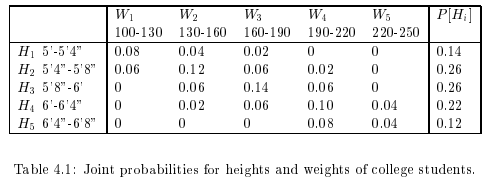

#### Answer:

Let $B = \{h \geq 5\text{ ft } 8\text{ in }\}$ and $A = \{w \geq 190lbs\}$. Note that we **cannot** simply count the corresponding number of outcomes in each event and divide by the total outcomes because the probabilities are **not equally likely**. Consequently, we need to consult the table provided for each individual probability. $P[A\cap B]$ is given by the sum of the **<span style="color:blue"> blue </span>** encircled probabilities in the figure below:

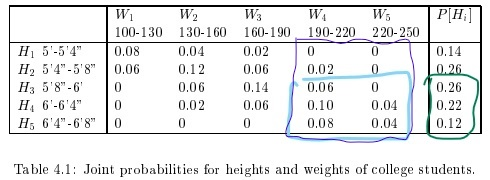

$$
P[A\cap B] = \sum_{i=3}^{5}\sum_{j=4}^{5}{P[(H_i,W_j)]} = 0.32.
$$

Next, we notice that $B$ is made of the rows $H_3,H_4,H_5$ so the marginal probability is $P[B] = \sum_{k=3}^5{P[H_k]} = 0.6$ (which corresponds to the **<span style="color:green"> green </span>** encircled probabilities). Hence, the conditional probability can be computed as

$$
\begin{equation}
    \begin{split}
        P[A|B] &= \frac{ \sum_{i=3}^{5}\sum_{j=4}^{5}{P[(H_i,W_j)]} }{ \sum_{k=3}^5{P[H_k]} } \\
               &= \frac{0.32}{0.6} \\
               &= 0.5\bar 3.
    \end{split}
\end{equation}               
$$

Finally, we are asked to find $P[A] = \sum_{i=1}^{5}\sum_{j=4}^{5}{P[(H_i,W_j)]} = 0.34$ which corresponds to the **<span style="color:purple"> purple </span>** encircled probabilities.

In [3]:
M = [0.14, 0.26, 0.26, 0.22, 0.12]
J = [0, 0, 0.02, 0, 0.06, 0, 0.1, 0.04, 0.08, 0.04]

Pa_given_b = sum(J[4:]) / sum(M[2:])
Pa = sum(J)

print(Pa_given_b)
print(Pa)

0.5333333333333333
0.33999999999999997


***
### 4.8 (w)

Using Table 4.1, find the probability that a student has a weight less than $160$ lbs if he/she has a height greater than $5'4"$. Also, find the probability that a student's weight is less than $160$ lbs if he/she has height _less_ than $5'4"$. Are these two results related?

#### Answer:

Let $B = \{h \geq 5\text{ ft } 4\text{ in }\}$, $A = \{w \leq 160lbs\}$, and $C = \{h \leq 5\text{ ft } 4\text{ in }\} = B^c$. We're interested in finding $P[A|B]$ and $P[A|B^c]$. Like the last problem we will consult the table for the joint and marginal probabilities. 

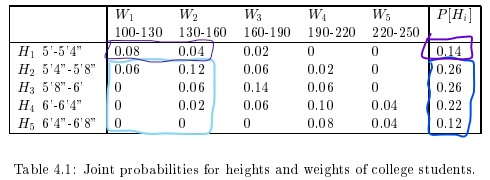


$$
\begin{equation}
    \begin{split}
        P[A|B] &= \frac{ \sum_{i=2}^{5}\sum_{j=1}^{2}{P[(H_i,W_j)]} }{ \sum_{k=2}^5{P[H_k]} } \\
               &= \frac{0.06 + 0.12 + 0 + 0.06 + 0 + 0.02 + 0 + 0}{0.26 + 0.26 + 0.22 + 0.12} \\
               &\approx 0.3.\\
        P[A|B^c] &= \frac{ \sum_{i=1}^{1}\sum_{j=1}^{2}{P[(H_i,W_j)]} }{ \sum_{k=1}^1{P[H_k]} } \\
                 &= \frac{0.08 + 0.04}{0.14} \\
                 &\approx 0.86.
    \end{split}
\end{equation}               
$$

In [2]:
J = [0.08, 0.04, 0.06, 0.12, 0, 0.06, 0, 0.02, 0, 0]

Pa_given_b = sum(J[2:]) / sum(M[1:])
Pa_given_bc = sum(J[:2]) / sum(M[:1])

print(Pa_given_b)
print(Pa_given_bc)

0.3023255813953489
0.857142857142857


***
### 4.9 (t)

Prove that the statement $P[A|B] + P[A|B^c]=1$ is false. Use Figure 4.2a to provide a counterexample.

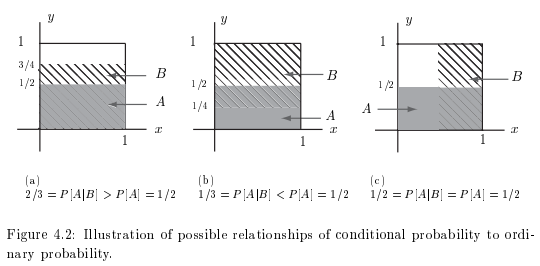

#### Answer:

We'll look to Figure 4.2a for a counterexample.  Notice that $A\cap B = \{x\in[0,1], y\in[0,\frac{1}{2}]\} = A$ and $A\cap B^c = \{\}$ so $P[A\cap B] = \frac{1}{2}$ and $P[A\cap B^c]=0$. Thus,

$$
P[A|B]=\frac{\big( \frac{2}{4} \big)}{\big( \frac{3}{4} \big)} = \frac{2}{3}
$$

and 

$$
P[A|B^c]=\frac{ 0 }{ \frac{3}{4} } = 0
$$

so we see that $1 \neq P[A|B] + P[A|B^c]= \frac{2}{3}$.


***
### 4.10 (t)

Prove that for the events $A,B,C$, which are not necessarily mutually exclusive,

$$
P[A\cup B|C] = P[A|C] + P[B|C] - P[A,B|C]
$$

#### Answer:

$$
\begin{equation}
    \begin{split}
        P[A\cup B|C] &= \frac{P[(A\cup B)\cap C]}{P[C]} \\
                     &= \frac{ P[(A\cap B)\cup(B\cap C)] }{P[C]} \\
                     &= \frac{ P[A\cap B] + P[B\cap C] - P[(A\cap B)\cap(B\cap C)] }{P[C]} \\
                     &= \frac{ P[A\cup B] }{P[C]} + \frac{ P[B\cap C] }{P[C]} - \frac{ P[(A\cap B)\cap C)] }{P[C]} \\
                     &= P[A|C] + P[B|C] - P[A,B|C].
    \end{split}
\end{equation}
$$

***
### 4.11 😃(w)

A group of $20$ patients afflicted with a disease agree at be a part of a clinical drug trial. The group is divied up into two groups of $10$ subjects each, with one group given the drug and the other group given sugar water, i.e. this is the control group. The drug is $80\%$ effective in curing the disease. If one is not given the drug, there is still a $20\%$ chance of a cure due to remission. What is the probability that a randomly selected subject will be cured?

In [ ]:
#### Answer:



***
### 4.12 (w)

A new bus runs on Sunday, Tuesday, Thursday, and Saturday while an older bus runs on the other days. The new bus has a probability of being on time $\frac{2}{3}$ while the older bus has a probability of only $\frac{1}{3}$. If a passenger chooses an arbitrary day of the week to ride the bus, what is the probaiblity that the bus will be on time?

In [ ]:
#### Answer:



***
### 4.13 (w)

A digital communications system transmits one of the three values $-1,0,1$. A channel adds noise to cause the encoder to sometimes make an error. The error rates are $12.5\%$ if a $-1$ is transmitted, $75\%$ if a $0$ is transmitted, $12.5\%$ if a $1$ is transmitted. If the probabilities for the various for the various symbols being transmitted are $P[-1]=P[1]=\frac{1}{4}$ and $P[0]=\frac{1}{2}$, find the probability of error. Repeat the problem for $P[-1]=P[1]=P[0]$ and explain your results.

In [ ]:
#### Answer:



***
### 4.14 😃(w)

A sample space is given by $S = \{ (x,y): 0\leq x \leq 1,0\leq y \leq 1 \}$. Determine $P[A|B]$ for the events

$$
A = \{ (x,y): y\leq 2x, 0\leq x \leq \frac{1}{2}, y \leq 2-2x, \frac{1}{2}\leq x\leq 1 \}
$$
$$
B = \{ (x,y): \frac{1}{2} \leq x \leq 1,0\leq y \leq 1 \}
$$

In [ ]:
#### Answer:



***
### 4.15 (w)

A sample space is given by $S = \{ (x,y): 0\leq x \leq 1,0\leq y \leq 1 \}$. Are the events

$$
A = \{ (x,y): y\leq x \}
$$
$$
B = \{ (x,y): y \leq 1-x \}
$$

independent? Repeat if $B = \{ (x,y): x \leq \frac{1}{4} \}$.

In [ ]:
#### Answer:



***
### 4.16 (t)

Give an example of two events that are mutually exclusive but not independent. Hint: See Figure 4.4.

In [ ]:
#### Answer:



***
### 4.17 (t) 

Consider the sample space $S = \{ (x,y,z): 0\leq x \leq 1, 0\leq y \leq 1, 0\leq z \leq 1 \}$, which is the unit cube. Can you find three events that are independent? Hint: See Figure 4.2c.

In [ ]:
#### Answer:



***
### 4.18 (t)

Show that if (4.9) is satisfied for _all_ possible events, then pairwise independence follows. In this case all events are independent.

In [ ]:
#### Answer:



***
### 4.19 😃(f)

It is known that that if it rains, there is a $50\%$ chance that a sewer will overflow. Also, if the sewer overflows, then there is a $30\%$ chance that the road will flood. If there is a $20\%$ chance that it will rain, what is the probability that the road will flood?

In [ ]:
#### Answer:



***
### 4.20 (w)

Consider the sample space $S= \{ 1,2,3,4 \}$. Each simple event is equally likely. If $A=\{1,2\},B=\{1,3\},C=\{1,4\}$ are these events pairwise independent? Are they independent?

In [ ]:
#### Answer:



***
### 4.21 😃(w)

In Example 4.6 determine if the events are pairwise independent. Are they independent?

In [ ]:
#### Answer:



***
### 4.22 😃(w)

An urn contains 4 red balls and 2 black balls. Two balls are chosen in succession without replacement. If it is known that the first ball drawn is black, what are they odds in favor of a red ball being chosen on the second draw?

In [ ]:
#### Answer:



***
### 4.23 (w)

In Example 4.7 plot the probability that the person has cancer given that the test results are positive, i.e. the posterior probability, as a function of the prior probability $P[B]$. How is the posterior probability that the person has cancer related to the prior probability?

In [ ]:
#### Answer:



***
### 4.24 (w)

An experiment consists of two subexperiments. First, a number is chosen at random from the interval $(0,1)$. Then, a second number is chosen at random from the same interval. Determine the sample space $S^2$ for the overall experiment. Next consider the event $A = \{ (x,y): \frac{1}{4} \leq x \leq \frac{1}{2}, \frac{1}{2} \leq y \leq \frac{3}{4} \}$ and find $P[A]$. Relate $P[A]$ to the probabilities defined on $S^1 = \{ u: 0< u < 1 \}$ where $S^1$ is the sample space for each subexperiment.

In [ ]:
#### Answer:



***
### 4.25 (w,c)

A fair coin is tossed 10 times. What is the probability of a run of exactly 5 heads in a row? Do not count runs of 6 or more heads in a row. Now verify your solution using a computer simulation.

In [ ]:
#### Answer:



***
### 4.26 😃(w)

A lady claims that she can tell whether a cup of tea containing milk had the tea poured first or the milk poured first. To test her claim an experiment is set up whereby at random the milk or tea is added first to an empty cup. This experiement is repeated 10 times. If she correctly identifies which liquid was poured first 8 out of 10, how likely is it that she is guessing? See [Salsburg 2001](https://www.amazon.com/Lady-Tasting-Tea-Statistics-Revolutionized/dp/0805071342) for a further discussion of the famous problem.

In [ ]:
#### Answer:



***
### 4.27 (f)

The probability $P[k]$ is given by the binomial law. If $M=10$, for what value of $p$ is $P[3]$ maximum? Explain your answer.

In [ ]:
#### Answer:



***
### 4.28 😃(f)

A sequence of independent subexperiments is conducted. Each subexperiement has the outsomes "success", "failure", or "don't know". If $P[success]=\frac{1}{2}$ and $P[failure]=\frac{1}{4}$, what is the probability of 3 successes in 5 trials?

In [ ]:
#### Answer:



***
### 4.29 (c)

Verify your results in Problem 4.28 by using a computer simulation.

In [ ]:
#### Answer:



***
### 4.30 (w)

A drunk person wanders aimlessly along a path by going forward one step with probability $\frac{1}{2}$ and going backward one step with probability $\frac{1}{2}$. After 10 steps what is the probability that he has moved 2 steps forward?

In [ ]:
#### Answer:



***
### 4.31 (f)

Prove that the geometric probability law (4.17) is a vaild probability assignment.

In [ ]:
#### Answer:



***
### 4.32 (w)


For a sequence of independent Bernoulli trials find the probability of the first failure at the $k^{th}$ trial for $k=1,2,\dots$.

In [ ]:
#### Answer:



***
### 4.33 😃(w)

For a sequence of independent Bernoulli trials find the probability of the second success at the $k^{th}$ trial.

In [ ]:
#### Answer:



***
### 4.34 (t)

Consider a sequence of independent Bernoulli trials. If it is known that the first $m$ trials resulted in failures, prove that the probabilityof the first success occuring at $m+l$ is given by the geometric law with $k$ replaced by $l$. In other words, the probability is the same as if we had started the process over again after the $m^{th}$ failure. There is no memory of the first $m$ failures.

In [ ]:
#### Answer:



***
### 4.35 (f)

An urn contains red, black, and white balls. The proportion of red is 0.4, the proportion of black is 0.4, and the proportion of white is 0.2. If 5 balls are drawn with replacement, what is the probability of 2 red, 2 black, and 1 white in any order?

In [ ]:
#### Answer:



***
### 4.36 (t)

We derive the multinomial coefficient for $N=3$. This will yield the number of ways that an $M$-tuple can be formed using $k_1$ $1$s, $k_2$ $2$s, and $k_3$ $3$s. To do so choose $k_1$ places in the $M$-tuple for the $1$s. There will be $M-k_1$ positions remaining. Of these positions choose $k_2$ places for the $2$s. Fill in the remaining $k_3=M-k_1-k_2$ positions using the $3$s. Using this result, determine the number of different $M$ digit sequences with $k_1$ $1$s, $k_2$ $2$s, and $k_3$ $3$s.

In [ ]:
#### Answer:



***
### 4.37 (t)

Show that the multinomial probability law reduces to the binomial law for $N=2$.

In [ ]:
#### Answer:



***
### 4.38 😃(w,c)

An urn contains 3 red balls, 3 black balls, and 3 white balls. If 6 balls are chosen with replacement, how many of each color is most likely? Hint: You will need a computer to evaluate the probabilities.

In [ ]:
#### Answer:



***
### 4.39 (w,c)

For the problem discussed in Example 4.10 change the probability of heads for the weighted coin from $p=0.25$ to $p=0.1$. Redraw the Markov state probability diagram. Next, using a computer simulation generate a sequence of length 100. Explain your results.

In [ ]:
#### Answer:



***
### 4.40 😃(f)

For the Markov state diagram in Figure 4.8 with an initial state probability of $P[0] = \frac{3}{4}$, find the probability of the sequence $0,1,1,0$.

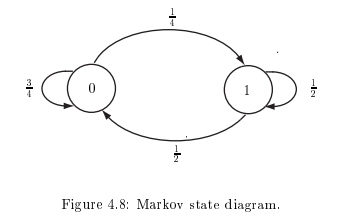

In [ ]:
#### Answer:



***
### 4.41 (f)

A two state Markov chain (see Figure 4.8) has the **state transition probabilities** $P[0|0] = \frac{1}{4}$, $P[0|1] = \frac{3}{4}$, and the initial state probability of $P[0] = \frac{1}{2}$. What is the probability of the sequence $0,1,0,1,0$?

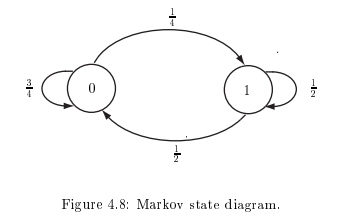

In [ ]:
#### Answer:



***
### 4.42 (w)

A digital communication system model is shown in Figure 4.12. In consists of two sections with each one modeling a different portion of the communication channel. What is the probability of a bit error? Compare this to the probability of error for the single section model shown in Figure 4.3, assuming that $\epsilon < \frac{1}{2}$, which is true in practice? Note that Figure 4.12 is a trellis.

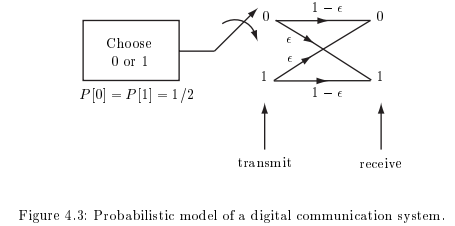
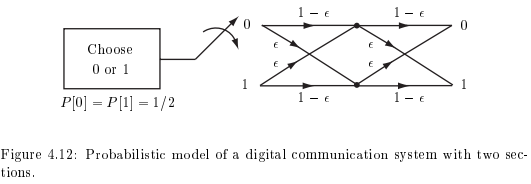

In [ ]:
#### Answer:



***
### 4.43 😃(f)

For the trellis shown in Figure 4.9 find the probability of the event $A = \{ (0,1,0,0),(0,0,0,0) \}$.

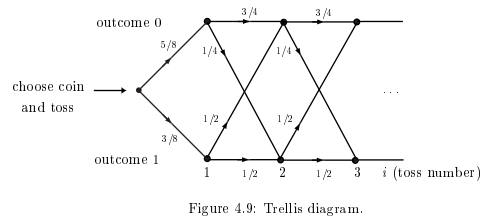

In [ ]:
#### Answer:

